In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

## Because the previous dataset that I'm using,didn't contain much information thats suits for linear regression(Predicting a continuous value)). 

## Today I'm using another dataset that is about the personal medical cost.


In [208]:
data=pd.read_csv('./insurance.csv')
print(data.info())
print('-----------------------------------------------------------------')
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
-----------------------------------------------------------------
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## Firstly, we can find out there is no null value in the data set.

* age : Indicates the age of the person. It contains data of type "int64".
* sex : It refers to the gender of the person. It contains "object" type data.
* bmi : It refers to the Body Mass Index of the person and contains the data of type "float64". BMI is a measure of the weight of a person, divided by the square of its length. Determines the person's obesity value. The formula for USA and METRIC units is as follows:
* children : It refers to the number of children that a person has. It contains data of type "int64".
* smoker : Indicates whether the person smokes or not. It contains "object" type data.
* region : Specifies which region the person is from. It contains "object" type data.
* charges : The person's total insurance premium is specified. Although not specified, it is assumed to be in US dollars. It contains "float64" type data.

In [160]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [86]:
data.corr()


,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


# Basic understanding about dataset

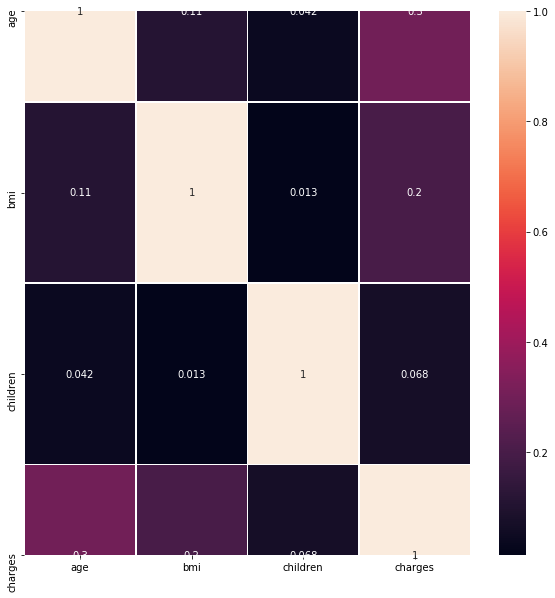

In [77]:
fig, axes = plt.subplots(figsize=(10, 10))  # This method creates a figure and a set of subplots
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes)  # Figure out heatmap
# Parameters:
# data : 2D data for the heatmap.
# annot : If True, write the data value in each cell.
# linewidths : Width of the lines that will divide each cell.
# ax : Axes in which to draw the plot, otherwise use the currently-active Axes.
plt.show()  # Shows only plot and remove other informations

## Data visualition

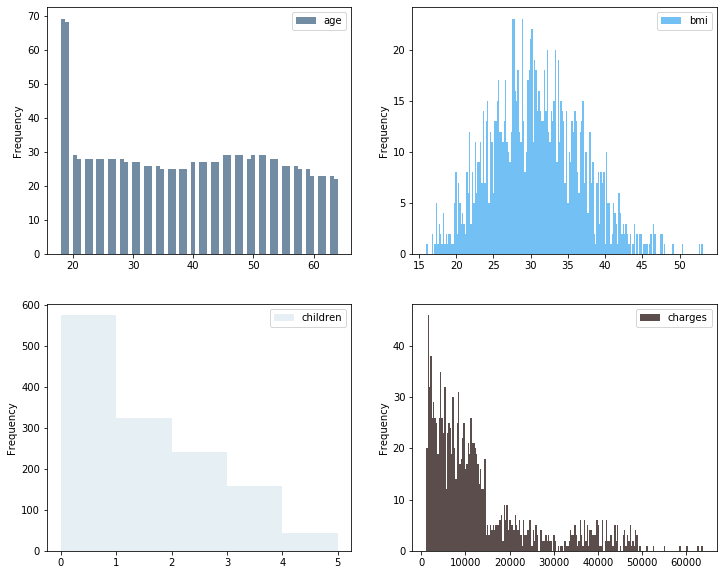

In [78]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
data.plot(kind="hist", y="age", bins=70, color="#728CA3", ax=axes[0][0])
data.plot(kind="hist", y="bmi", bins=200, color="#73C0F4", ax=axes[0][1])
data.plot(kind="hist", y="children", bins=5, color="#E6EFF3", ax=axes[1][0])
data.plot(kind="hist", y="charges", bins=200, color="#5A4D4C", ax=axes[1][1])
plt.show()

### By the charts above we can know the distribution of each feature. 

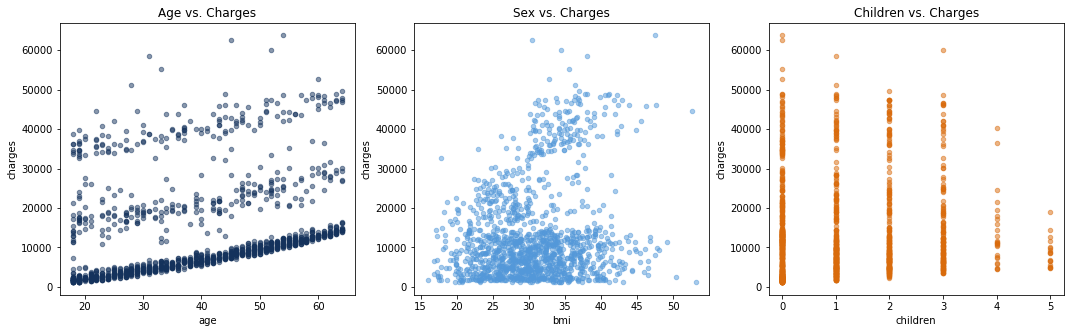

In [191]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
data.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='#14325C', ax=axes[0], title="Age vs. Charges")
data.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='#5398D9', ax=axes[1], title="Sex vs. Charges")
data.plot(kind='scatter', x='children', y='charges', alpha=0.5, color='#D96B0C', ax=axes[2], title="Children vs. Charges")
plt.show()

### As far as age is concerned, we can find out the medical charges are positive proportional to the age, which is uqite make sense. 
### As for BMI,  we do can find out those who have high BMI, is more likely to pay higher medical charges.

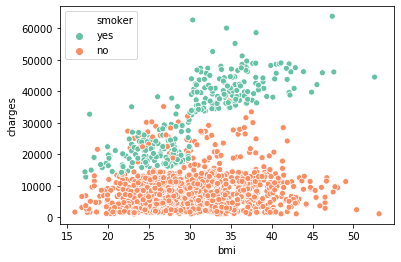

In [192]:
sns.scatterplot(x="bmi", y="charges", data=data, palette='Set2', hue='smoker')


### We can easily found out that under the same BMI the mediacal charges of smoker is significantly higher than the non-smokers.
----

### And we convert the smoker and sex to numeric value.

In [209]:
data.smoker=data.smoker.map({'yes':1,'no':0})
data.smoker.value_counts()


0    1064
1     274
Name: smoker, dtype: int64

In [210]:
data.sex=data.sex.map({'male':1,'female':0})
data.sex.value_counts()

1    676
0    662
Name: sex, dtype: int64

## Split the dataset to X and Y

In [211]:
data.drop(['region'],axis=1,inplace=True)

X=data.drop(['charges'],axis=1)
Y=data['charges']

print(X.head())

   age  sex     bmi  children  smoker
0   19    0  27.900         0       1
1   18    1  33.770         1       0
2   28    1  33.000         3       0
3   33    1  22.705         0       0
4   32    1  28.880         0       0


In [212]:
X["bmi"] = (X.bmi - np.min(X.bmi))/(np.max(X.bmi) - np.min(X.bmi))
print(X.head())


   age  sex       bmi  children  smoker
0   19    0  0.321227         0       1
1   18    1  0.479150         1       0
2   28    1  0.458434         3       0
3   33    1  0.181464         0       0
4   32    1  0.347592         0       0


In [213]:
from sklearn.model_selection import train_test_split  # Import "train_test_split" method
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=38)
print(x_train)
print(y_train)

      age  sex       bmi  children  smoker
623    18    1  0.472828         0       1
581    19    1  0.393597         0       0
200    19    0  0.434490         0       0
1274   26    1  0.298628         0       1
111    55    0  0.369653         2       0
...   ...  ...       ...       ...     ...
737    26    1  0.208232         2       0
1282   18    0  0.153349         0       1
900    49    1  0.176352         0       0
316    50    1  0.437046         0       0
53     36    1  0.496906         0       1

[1070 rows x 5 columns]
623     34617.84065
581      1639.56310
200      2130.67590
1274    17043.34140
111     11881.35800
           ...     
737      3484.33100
1282    14283.45940
900      8688.85885
316      8835.26495
53      37742.57570
Name: charges, Length: 1070, dtype: float64


----
## Simple linear regression :
### we choose BMI as x,to predict the corresponding charges.

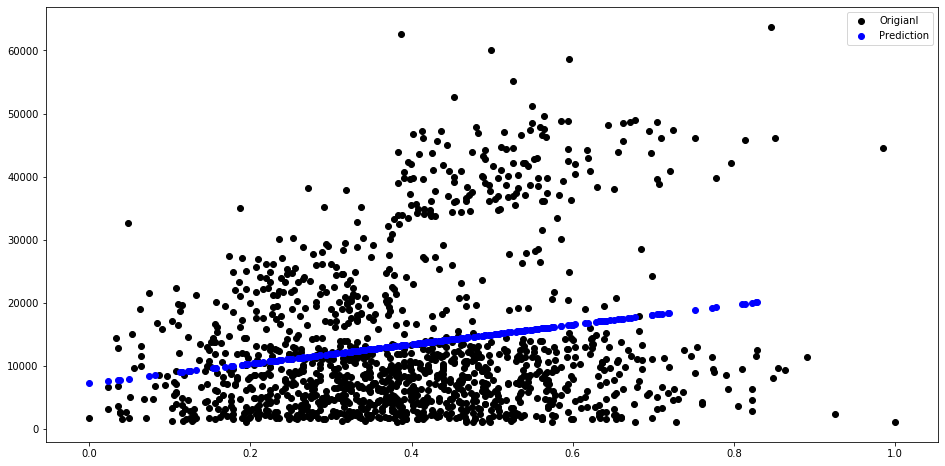

In [214]:
simple_linear_reg=LinearRegression()
simple_linear_reg.fit(x_train.bmi.values.reshape(-1,1),y_train)
Prediction=simple_linear_reg.predict(x_test.bmi.values.reshape(-1,1))

plt.figure(figsize=(16,8))

plt.scatter(X.bmi,Y,c='black',label='Origianl')
plt.scatter(x_test.bmi,Prediction,c='blue',label='Prediction')
plt.legend()
plt.show()

### We can easily see that because the data is too complicated, the results predicted by simple linear regression is not very accurate.
-----

### So following I will use some regression model try to have a better result.

## Multiple linear regression

In [215]:
multiple_linear_reg = LinearRegression(fit_intercept=False,normalize=True)  # Create a instance for Linear Regression model
multiple_linear_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

## Polynomial linear regression

In [216]:
polynomial_features = PolynomialFeatures(degree=3)  # Create a PolynomialFeatures instance in degree 3
x_train_poly = polynomial_features.fit_transform(x_train)  # Fit and transform the training data to polynomial
x_test_poly = polynomial_features.fit_transform(x_test)  # Fit and transform the testing data to polynomial

polynomial_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
polynomial_reg.fit(x_train_poly, y_train)  # Fit data to the model

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

## Decision tree regression

In [217]:
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(x_train, y_train)  # Fit data to the model

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=13, splitter='best')

## Random forest regrssion

In [218]:
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regression model

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(x_train, y_train)  # Fit data to the model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=13, verbose=0,
                      warm_start=False)

---
## Evaluation Model : Because it's hard to visualize the result of each model. In this section we will do some measurements to evaluate the performance on the models we fit. 
## I will use following metric to determine the performance of each model
* R2 score
* RMSE score



In [219]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

**Evaluating Multiple Linear Regression Model**

In [221]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(x_train)
# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(x_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, Y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(Y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  0.7349353567311003
Testing Accuracy for Multiple Linear Regression Model:  0.6930564433613213
RMSE for Training Data:  6337.433153036048
RMSE for Testing Data:  6233.016718587124
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.725833988666255


**Evaluating Polynomial Regression Model**

In [222]:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train)

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test)

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), Y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(Y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Training Accuracy for Polynomial Regression Model:  0.8541761284562099
Testing Accuracy for Polynomial Regression Model:  0.8159698674199801
RMSE for Training Data:  4700.583836612859
RMSE for Testing Data:  4826.290963282682
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.8391072917717248


**Evaluating Decision Tree Regression Mode**

In [223]:
# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(x_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(x_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, Y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(Y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.8833393572717199
Testing Accuracy for Decision Tree Regression Model:  0.8163629639882319
RMSE for Training Data:  4204.357846314286
RMSE for Testing Data:  4821.133621392454
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8494241031595924


**Evaluate for random forest**

In [224]:
# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(x_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(x_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, Y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(Y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.8907930796950516
Testing Accuracy for Random Forest Regression Model:  0.853979607357261
RMSE for Training Data:  4067.8279000224125
RMSE for Testing Data:  4299.082577404704
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8573950228640141


In [225]:
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR]
parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=5", "n_estimators=400, max_depth=5"]
table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,0.734935,0.693056,6337.433153,6233.016719,0.725834
Polynomial Regression,fit_intercept=False,0.854176,0.815970,4700.583837,4826.290963,0.839107
Decision Tree Regression,max_depth=5,0.883339,0.816363,4204.357846,4821.133621,0.849424
Random Forest Regression,"n_estimators=400, max_depth=5",0.890793,0.853980,4067.827900,4299.082577,0.857395


**Now let's compare the training and testing accuracy of each model:**

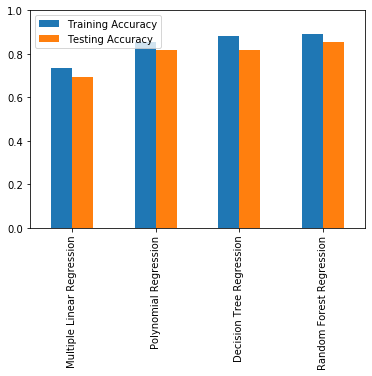

In [226]:
table_dataframe.iloc[:, 1:3].plot(kind="bar", ylim=[0.0, 1.0])

**Let's compare each model's training and testing RMSE:**

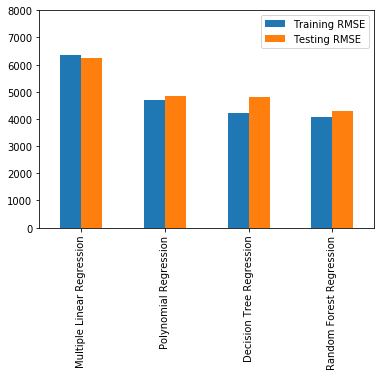

In [228]:
table_dataframe.iloc[:, 3:5].plot(kind="bar", ylim=[0.0, 8000])

**Finally, compare the score values for 10-Fold Cross Validation:**


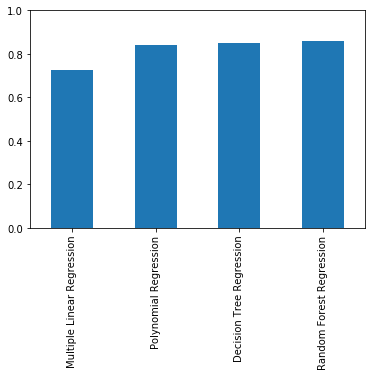

In [229]:
table_dataframe.iloc[:, 5].plot(kind="bar", ylim=[0.0, 1.0])

**As you can see, The result predicted by the multiple linear regreession is the least accurate, which is roughly 70% accuracy.
As for polynomail , decision tree , random forest regression, all of them are approximately 80% ~ 85% accuracy.**


**And the random forest regression has the highest accuracy, which is roughly 85%.**
